In [1]:
!pip install -q deep_autoviml

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from deep_autoviml import deep_autoviml as deepauto



Imported deep_auto_viml. version=0.0.67
from deep_autoviml import deep_autoviml as deepauto
-------------------
model, cat_vocab_dict = deepauto.fit(train, target, keras_model_type="fast",
		project_name="deep_autoviml", keras_options=keras_options,  
		model_options=model_options, save_model_flag=True, use_my_model='',
		model_use_case='', verbose=0)

predictions = deepauto.predict(model, project_name, test_dataset=test,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)
                                


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

!ls '/content/gdrive/My Drive/SEM4/297DL/hw4/data/titanic'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
titanic_test.csv  titanic_train.csv


In [4]:
datapath = '/content/gdrive/My Drive/SEM4/297DL/hw4/data/titanic/'
filename = 'titanic_train.csv'
sep = ','
train_datafile = datapath+filename
target = 'Survived'

In [5]:
train = pd.read_csv(train_datafile, header=0, sep=sep)
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
filename = 'titanic_test.csv'
url = datapath + filename
test = pd.read_csv(url, header=0, sep=sep)
print(train.shape, test.shape)
test.head()

(891, 12) (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
keras_model_type = "auto" ## always try "fast" first, then "fast1", "fast2", "auto" in that order
project_name = "taxi"
model_options = {'nlp_char_limit':50, 'cat_feat_cross_flag':"",
                 'max_trials': 5, "tuner": "storm"}
keras_options = {"patience":10, 'class_weight': True, 'early_stopping': True, 
                 'lr_scheduler': '', "optimizer": 'RMS'}

    Only CPU found on this device
Setting CPU strategy using 1 devices
Using following keras_options given as input:
    patience : 10
    optimizer : RMS
    class_weight : True
    lr_scheduler : 
    early_stopping : True
Using following model_options given as input:
    cat_feat_cross_flag : 
    nlp_char_limit : 50
    max_trials : 5
    tuner : storm
Max Trials : 5. Please increase max_trials if you want to better accuracy...

#################################################################################
###########     L O A D I N G    D A T A    I N T O   TF.DATA.DATASET H E R E  #
#################################################################################
        
CSV file being loaded into tf.data.Dataset
    Since number of rows in file <= 10000 maxrows, loading entire file into pandas for EDA
Alert! Modified column names to satisfy rules for column names in Tensorflow...
    Model type is Classification and Single_Label problem
Loaded a small data sample of size = 

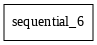

Model plot saved in file: deep_autoviml_taxi_auto_model_before.png

#################################################################################
###########     T R A I N I N G    K E R A S   M O D E L   H E R E      #########
#################################################################################
    
Building and training an automatic model using storm Tuner...
    Class weights: {0: 1.0, 1: 1.3026315789473684}
    original datasize = 892, initial batchsize = 48
    Early stopping : True
    recommended steps per epoch = 10
    default initializer = lecun_normal, default activation = selu
    Onecycle steps = 1000
    number of classes = 2, output_activation = sigmoid
    loss function: SparseCategoricalCrossentropy
    steps_per_epoch = 10, number epochs = 100
    val mode = max, val monitor = val_balanced_sparse_categorical_accuracy, patience = 10
Tensorboard log directory can be found at: deep_autoviml/mylogs
    chosen keras LR scheduler = default

Splitting train 

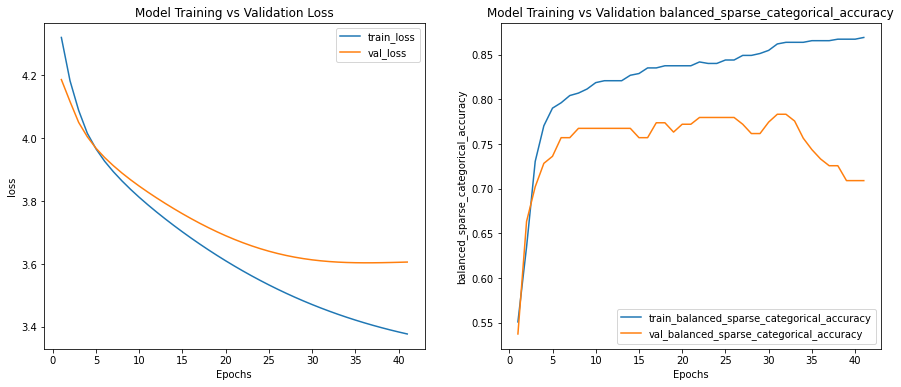

Time taken to train model (in mins) = 1
    Stopped epoch = 31
Held out data actuals shape: (96,)
    samples from label: [0, 1, 1, 1, 0, 0, 0, 0, 1, 1]

Held out predictions shape:(96,)
    Sample predictions: [0 1 0 1 0 0 0 0 1 1]

###########################################################
         Held-out test data set Results:
Single Label, Multi Class Model Metrics Report: Survived
#################################################################


    Accuracy          = 77.1%
    Balanced Accuracy = 77.5%
    Precision         = 68.9%
    Average Precision = 76.6%
    Recall            = 79.5%
    F1 Score          = 73.8%
    ROC AUC           = 77.7%
#####################################################

Finally, training on full train dataset. This will take time...
    best learning rate = 0.0002970599
    set learning rate using best model: 0.0002970599
    max epochs for training = 31

Model not being saved since save_model_flag set to False...
6265

Saving vocab dictionary using pickle in taxi/auto/model_2021_10_26-01_47_36/artifacts/cat_vocab_dict.pickle...will take time...
    Saved pickle file in taxi/auto/model_2021_10_26-01_47_36/artifacts/cat_vocab_dict.pickle

Saving variable definitions file using pickle in taxi/auto/model_2021_10_26-01_47_36/artifacts/var_df.pickle...will take time...
    Saved pickle file in taxi/auto/model_2021_10_26-01_47_36/artifacts/var_df.pickle

Deep_Auto_ViML completed. Total time taken 

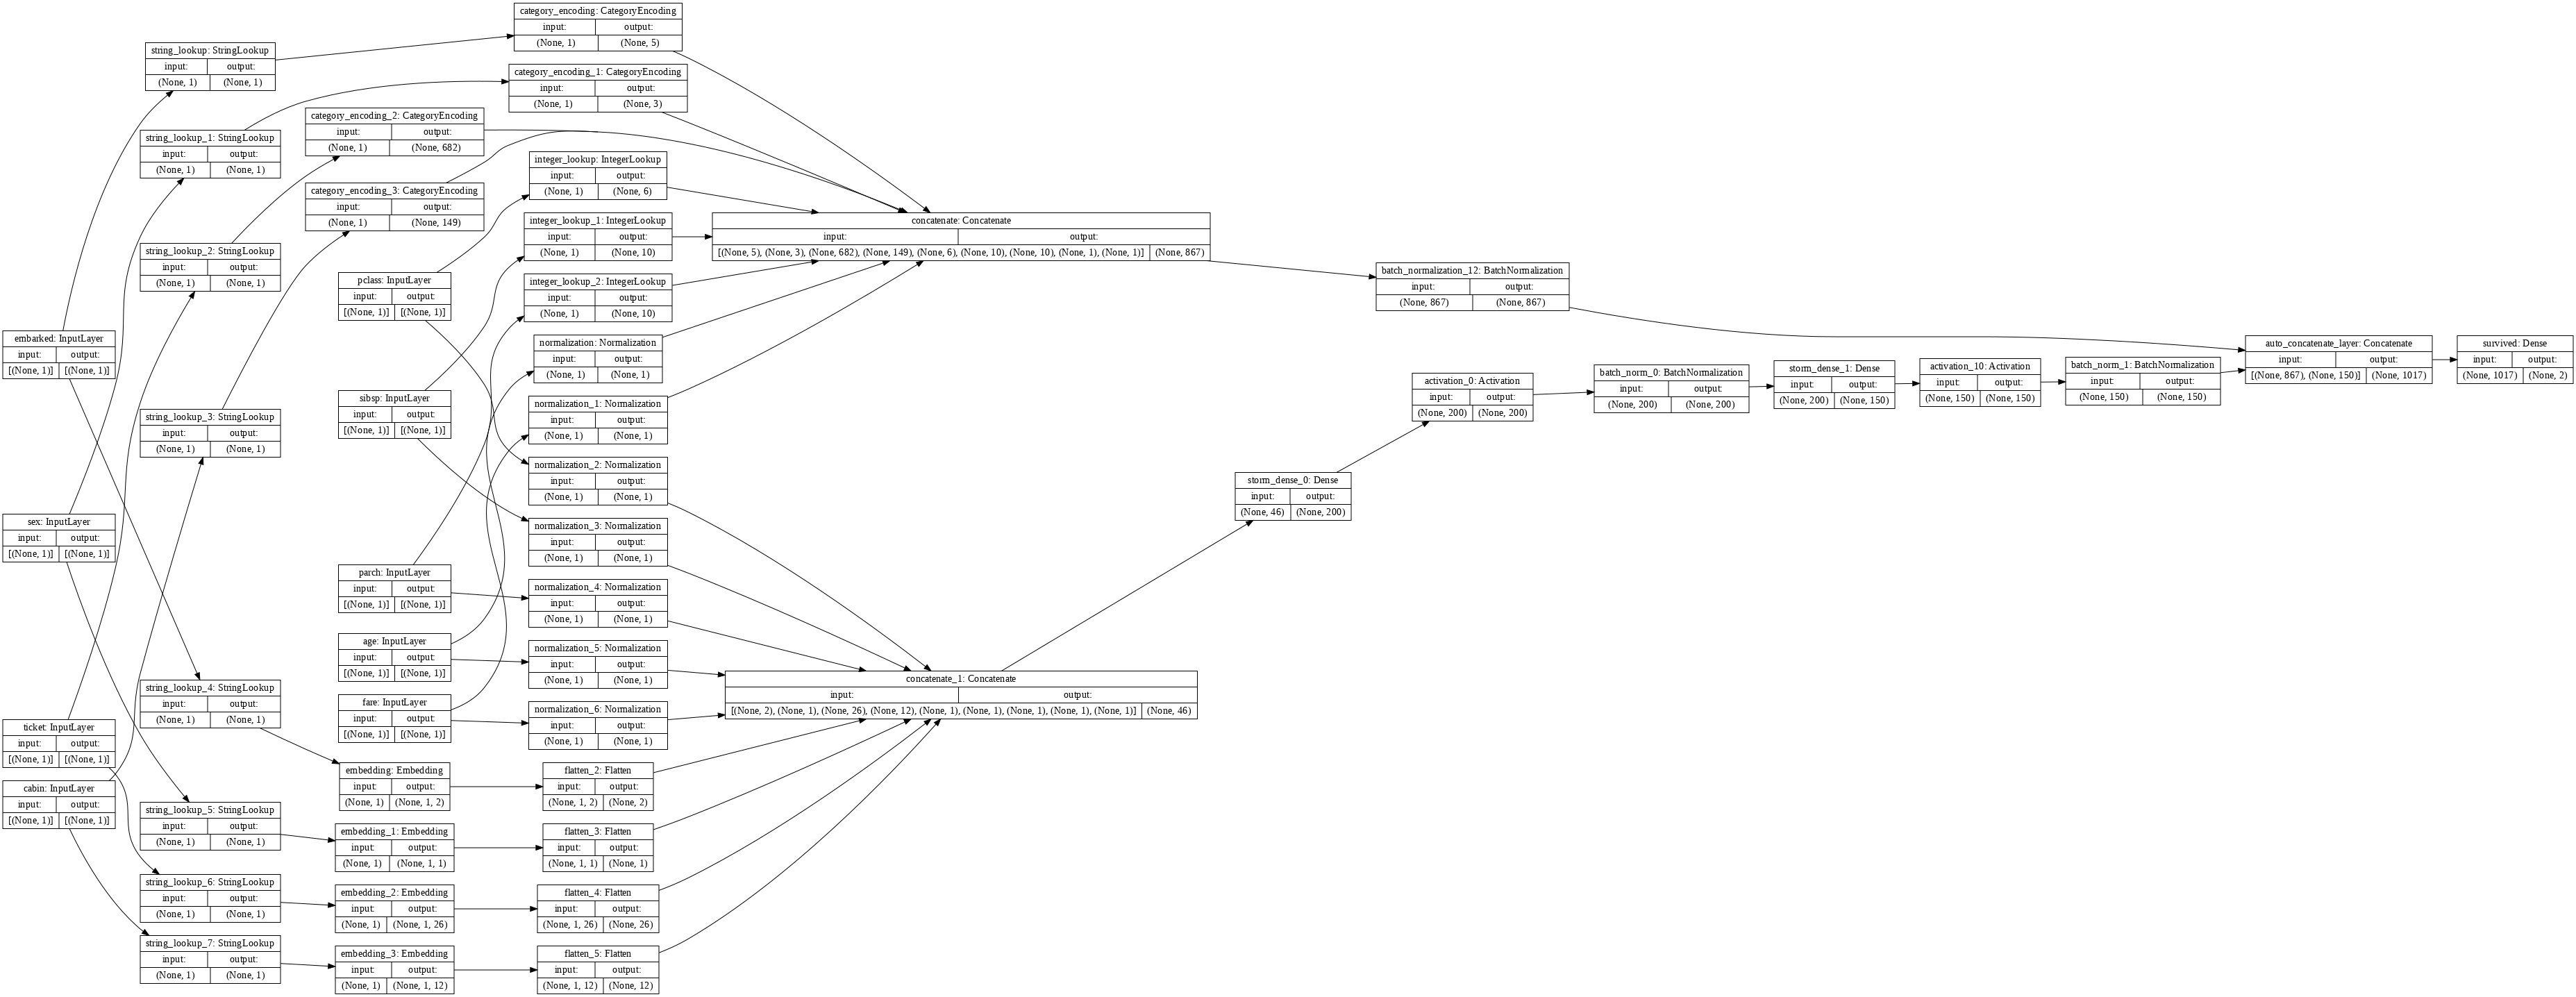

Model plot saved in file: deep_autoviml_taxi_auto_model_after.png


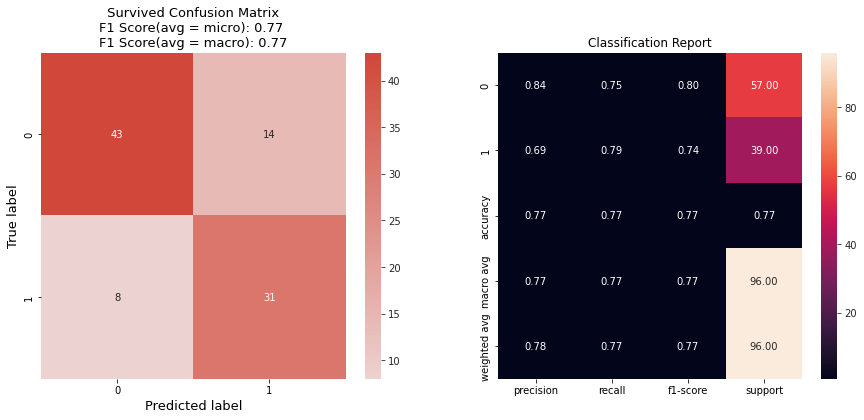

In [8]:
 model, cat_vocab_dict = deepauto.fit(train_datafile, target, keras_model_type=keras_model_type,
		project_name=project_name, keras_options=keras_options, model_options=model_options, 
		save_model_flag=False, use_my_model='', verbose=1)

In [9]:
from deep_autoviml.utilities.utilities import plot_classification_results, print_regression_model_stats
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
#from autoviml.Auto_ViML import plot_regression_scatters

In [10]:
predictions = deepauto.predict(model, project_name, test_dataset=url,
                                 keras_model_type=keras_model_type, 
                                 cat_vocab_dict=cat_vocab_dict)


Loading deep_autoviml model from <keras.engine.functional.Functional object at 0x7efd1df8dfd0> folder. This will take time...

Using <keras.engine.functional.Functional object at 0x7efd1df8dfd0> model provided as input...
Time taken to load saved model = 0 seconds
Loaded test data size: 418
Alert! Modified column names to satisfy rules for column names in Tensorflow...
Alert! cabin has 2 mixed data types: Index([<class 'float'>, <class 'str'>], dtype='object') 
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    11 Predictors classified...
    possible latitude columns in dataset: []
        after further analysis, no latitude columns found
    possible longitude columns in dataset: []
        after further analysis, no longitude columns found
        2 variable(s) to be removed since they were ID or low-information variables
Distribution of string columns in datatset:
    number of binary = 1, cats = 1, high cats = 1,

In [11]:
y_preds = predictions[1]
y_preds[:10]

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 0])